In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pydaptivefiltering as pdf

In [2]:
# Gerar sinais de teste
np.random.seed(42)
n_samples = 1000
filter_order = 10

# Entrada: Ruído branco Gaussiano
x = np.random.randn(n_samples).astype(np.complex128) # Força complexo
w_unknown = np.random.randn(filter_order + 1).astype(np.complex128)

d_clean = np.convolve(x, w_unknown, mode='full')[:n_samples]
noise = 0.01 * np.random.randn(n_samples).astype(np.complex128)
d = d_clean + noise

In [3]:
# forgetting_factor (lambda): próximo de 1 (0.94 a 0.99)
# epsilon: pequena constante positiva para inicializar a energia do erro
f_rls = pdf.FastRLS(
    filter_order=filter_order, 
    forgetting_factor=0.99, 
    epsilon=0.1
)

# Executar a otimização
result = f_rls.optimize(input_signal=x, desired_signal=d, verbose=True, return_internal_states=True)

[FastRLS] Completed in 15.50 ms


C:\Users\bruno\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\bruno\anaconda3\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\bruno\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


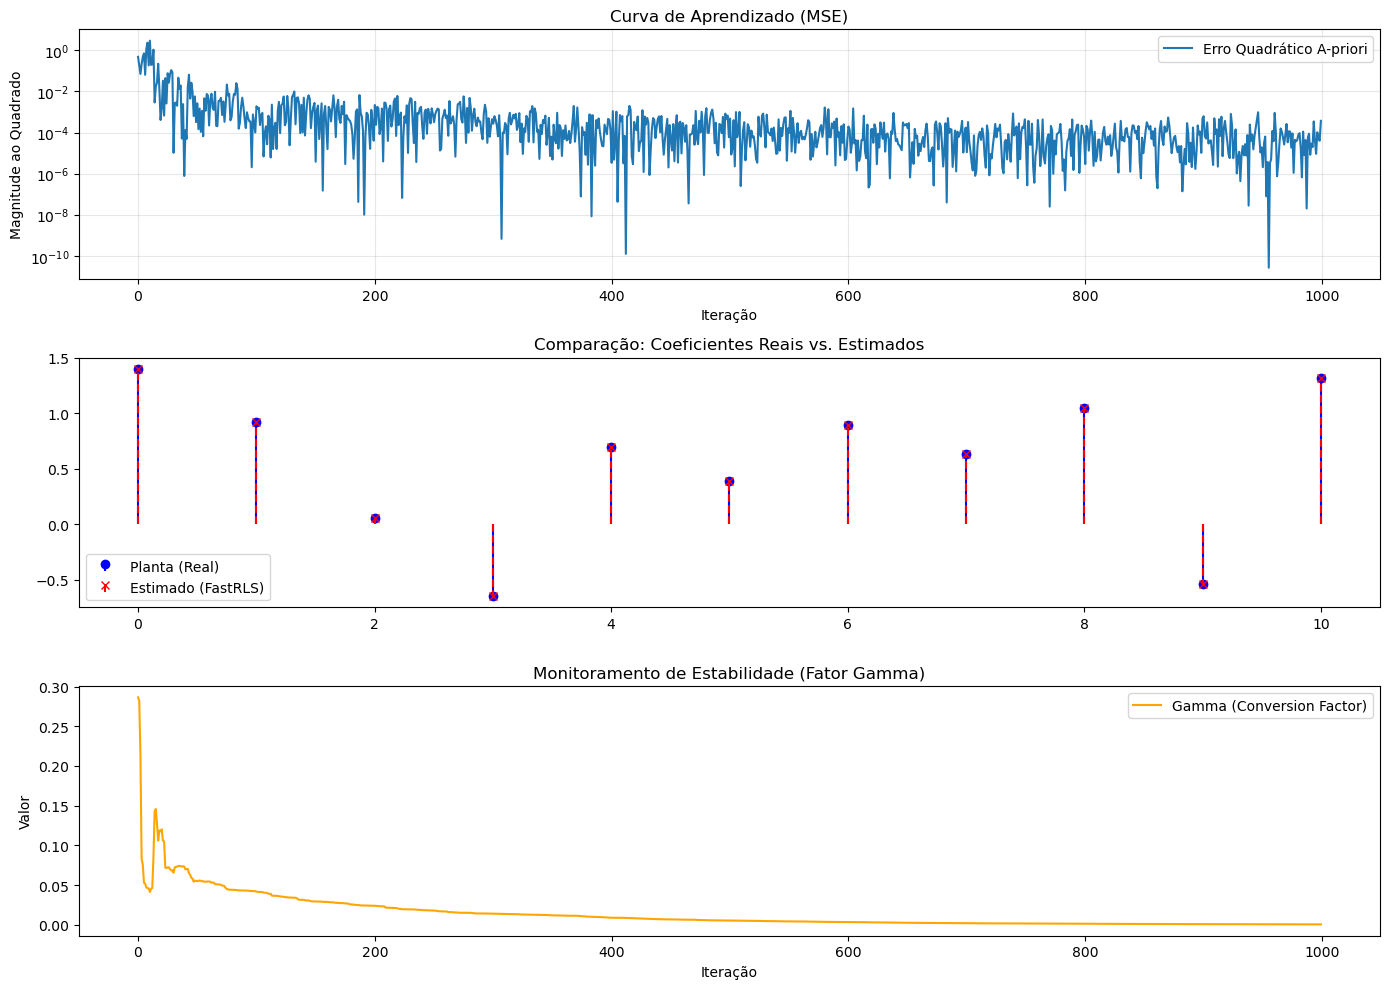


Resultados Finais:
Erro Quadrático Médio nos Pesos (MSD): 3.43e-07


In [4]:
# --- VISUALIZAÇÃO DOS RESULTADOS ---

plt.figure(figsize=(14, 10))

# Erro de Aprendizado (Learning Curve)
plt.subplot(3, 1, 1)
plt.semilogy(np.abs(result.errors)**2, label='Erro Quadrático A-priori')
plt.title('Curva de Aprendizado (MSE)')
plt.xlabel('Iteração')
plt.ylabel('Magnitude ao Quadrado')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

# Comparação de Coeficientes
plt.subplot(3, 1, 2)
w_final = f_rls.w
plt.stem(w_unknown, linefmt='b-', markerfmt='bo', basefmt=' ', label='Planta (Real)')
plt.stem(w_final, linefmt='r--', markerfmt='rx', basefmt=' ', label='Estimado (FastRLS)')
plt.title('Comparação: Coeficientes Reais vs. Estimados')
plt.legend()

# Fator de Conversão (Gamma) - Importante para monitorar instabilidade do FTRLS
plt.subplot(3, 1, 3)
if "gamma" in result.extra:
    plt.plot(result.extra["gamma"], color='orange', label='Gamma (Conversion Factor)')
    plt.title('Monitoramento de Estabilidade (Fator Gamma)')
    plt.ylabel('Valor')
    plt.xlabel('Iteração')
    plt.legend()

plt.tight_layout()
plt.show()

# Calcular Erro Final de Desajuste (Misadjustment)
msd = np.mean(np.abs(w_unknown - w_final)**2)
print(f"\nResultados Finais:")
print(f"Erro Quadrático Médio nos Pesos (MSD): {msd:.2e}")